# Chris White
## Term Project Milestone 1
## 04 April 2021



For this project I will be using the North Korean Missile Test Database found on Kaggle. I am familiar with this data due to work so this will be fun to apply lessons learned from the course to work material in an unclassified setting. I will perform graphical analysis on the .csv file initially to determine the direction to head in as we continue progress through the course. A short description of the dataset is provided from Kaggle. 
“The James Martin Center for Nonproliferation Studies (CNS) North Korea Missile Test Database is the first database to record flight tests of all missiles launched by North Korea capable of delivering a payload of at least 500 kilograms (1102.31 pounds) a distance of at least 300 kilometers (186.4 miles). The database captures advancements in North Korea's missile program by documenting all such tests since the first one occurred in April 1984, and will be routinely updated as events warrant.” (Kaggle, 2021). 
This dataset is covers North Korean missile testing from 1984 through April of 2017. Below you find bar charts of missile type and missile name. You will also find a pie chart of missile test success rates and an additional pie chart of whether or not the missile tests were confirmed versus unconfirmed in the database. 
Reference: 
Kaggle. (2021). North Korea Missile Test Database North Korean missile tests since 1984. Retrieved from https://www.kaggle.com/fanbyprinciple/north-korea-missile-test-database

In [1]:
import pandas as pds

In [5]:
df = pds.read_csv('north_korea_missile_tests_database.csv')
df.head()

,F1,Date,Date Entered/Updated,Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee (km),Distance Travelled (km),Confirmation Status,Success,Additional Information,Source(s)
0,1,9-Apr-84,23-Dec-16,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,The 1984 tests possibly took place over the co...,http://www.nti.org/media/pdfs/north_korea_miss...
1,2,9-Apr-84,23-Dec-16,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,NaN,http://www.nti.org/media/pdfs/north_korea_miss...
2,3,9-Apr-84,23-Dec-16,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,200,Unknown,Confirmed,Success,NaN,http://www.astronautix.com/g/gitdaeryung.html;...
3,4,Sep-84,23-Dec-16,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Failure,NaN,"Joseph S. Bermudez, ""A History of Ballistic Mi..."
4,5,Sep-84,23-Dec-16,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,200,Unknown,Confirmed,Failure,NaN,http://www.astronautix.com/g/gitdaeryung.html;...


In [6]:
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (106, 18)


In [7]:
import matplotlib.pyplot as plt

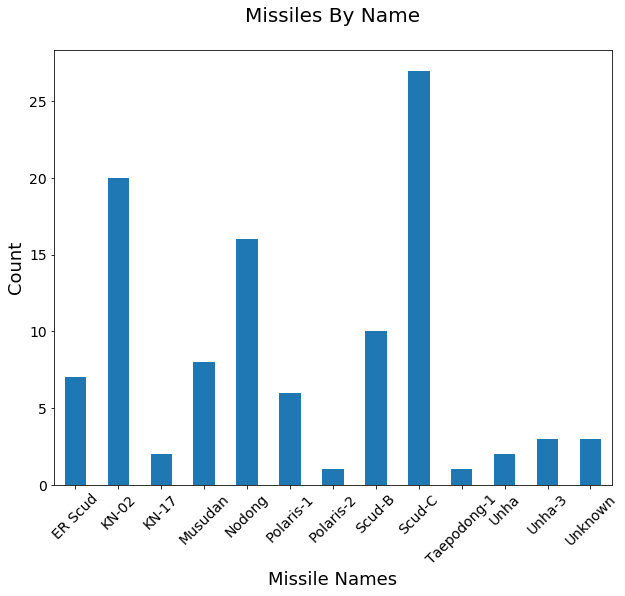

In [8]:
ax = df['Missile Name'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(10,8))
ax.set_title('Missiles By Name\n', fontsize=20)
ax.set_xlabel('Missile Names', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.xticks(rotation=45)
plt.show()

## Scud-C, KN-02, and Nodong are the Top Three Missiles fired per the dataset

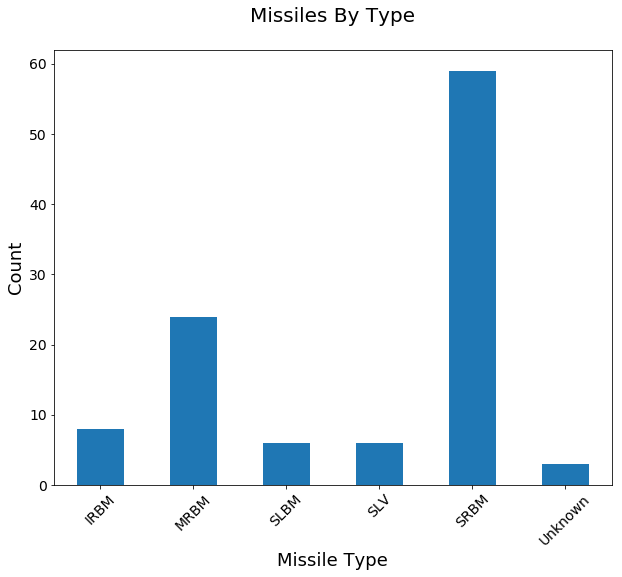

In [9]:
ax = df['Missile Type'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(10,8))
ax.set_title('Missiles By Type\n', fontsize=20)
ax.set_xlabel('Missile Type', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.xticks(rotation=45)
plt.show()

## SRBMs and MRBMs are most common amongst the dataset

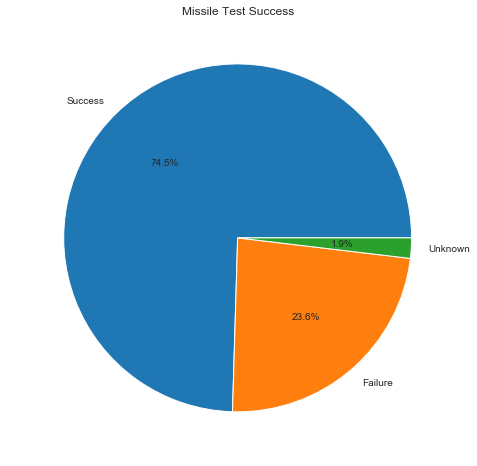

In [10]:
import seaborn as sns
# The pie chart using matplotlib
sns.set_style("whitegrid")
ax=plt.subplots(1,1,figsize=(10,8))
df['Success'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8))
plt.title("Missile Test Success")
plt.ylabel(' ')
plt.show()

## This Pie Chart is a quick visual refernence to the success rates of their test launches with neartly 75% success

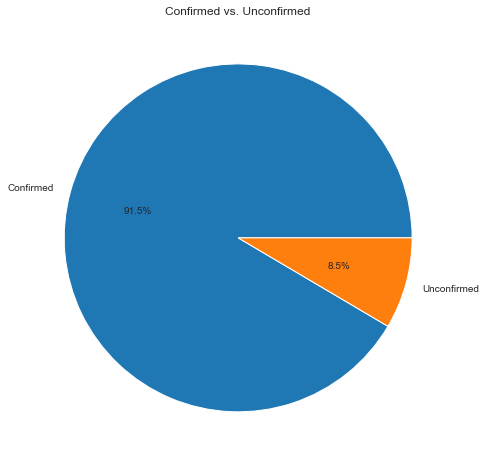

In [11]:
# The pie chart using matplotlib
sns.set_style("whitegrid")
ax=plt.subplots(1,1,figsize=(10,8))
df['Confirmation Status'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8))
plt.title("Confirmed vs. Unconfirmed")
plt.ylabel(' ')
plt.show()

## The Pie Chart displays the percentage of confirmed versus unconfirmed missile tests with over 90% confirmed

## Conclusion

### Overall this is a quick visual representation of the missile tests by type, name, success and confirmation. 
### There is additional data to be sorted as well, for instance the source information could be useful.
### Potentially plotting out the launch locations as well.
### There is are some fields that I will most likely strip out of the data set as well, one instance is the date entered.

<a id="cell33"></a>

# Begin Milestone 2

## Based on feedback what am I attempting to predict. Let's try to predict when North Korea might launch missiles the most and what type.

In [12]:
# Converting to dummy variables instead of strings

cat_features = ['Success', 'Confirmation Status']
data_cat = df[cat_features]
# One Hot Encoding 
data_cat_dummies = pds.get_dummies(data_cat)
data_cat = data_cat.replace({'Success': {1: '1st', 2: '2nd', 3: '3rd'}})
# check the data
print(data_cat_dummies.head(8))

   Success_Failure  Success_Success  Success_Unknown  \
0                0                1                0   
1                0                1                0   
2                0                1                0   
3                1                0                0   
4                1                0                0   
5                1                0                0   
6                0                0                1   
7                1                0                0   

   Confirmation Status_Confirmed  Confirmation Status_Unconfirmed  
0                              1                                0  
1                              1                                0  
2                              1                                0  
3                              1                                0  
4                              1                                0  
5                              1                                0  
6                  

In [13]:
# Stripping away some columns of information not useful for my predictions

df.drop(['Date Entered/Updated', 'Launch Agency/Authority', 'Source(s)',
         'Additional Information', 'Facility Name', 'Facility Location', 'Other Name'], axis='columns', inplace=True)
df.head()

,F1,Date,Missile Name,Missile Type,Facility Latitude,Facility Longitude,Landing Location,Apogee (km),Distance Travelled (km),Confirmation Status,Success
0,1,9-Apr-84,Scud-B,SRBM,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success
1,2,9-Apr-84,Scud-B,SRBM,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success
2,3,9-Apr-84,Scud-B,SRBM,40.8499966,129.666664,Unknown,200,Unknown,Confirmed,Success
3,4,Sep-84,Scud-B,SRBM,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Failure
4,5,Sep-84,Scud-B,SRBM,40.8499966,129.666664,Unknown,200,Unknown,Confirmed,Failure


In [14]:
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (106, 11)


In [15]:
# replacing all of the string 'unknown' to NaN

import numpy as np
df = df.replace('Unknown',np.NaN)

In [16]:
# Dropping the NaNs to really boil down the dataframe

#df = df.dropna()

In [17]:
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (106, 11)


In [18]:
# Whats left for analysis and continued exploration

df.head()

,F1,Date,Missile Name,Missile Type,Facility Latitude,Facility Longitude,Landing Location,Apogee (km),Distance Travelled (km),Confirmation Status,Success
0,1,9-Apr-84,Scud-B,SRBM,40.8499966,129.666664,NaN,NaN,NaN,Confirmed,Success
1,2,9-Apr-84,Scud-B,SRBM,40.8499966,129.666664,NaN,NaN,NaN,Confirmed,Success
2,3,9-Apr-84,Scud-B,SRBM,40.8499966,129.666664,NaN,200,NaN,Confirmed,Success
3,4,Sep-84,Scud-B,SRBM,40.8499966,129.666664,NaN,NaN,NaN,Confirmed,Failure
4,5,Sep-84,Scud-B,SRBM,40.8499966,129.666664,NaN,200,NaN,Confirmed,Failure


<a id="cell24"></a>

# Begin Milestone 3

## Reviewing feedback I am reshaping the data set 
## I am also focusing on predicting the success based on missile name and type using regression

In [19]:
df.drop(['Facility Latitude', 'Facility Longitude', 'Landing Location',
         'Apogee (km)', 'Distance Travelled (km)'], axis='columns', inplace=True)
df.head()

,F1,Date,Missile Name,Missile Type,Confirmation Status,Success
0,1,9-Apr-84,Scud-B,SRBM,Confirmed,Success
1,2,9-Apr-84,Scud-B,SRBM,Confirmed,Success
2,3,9-Apr-84,Scud-B,SRBM,Confirmed,Success
3,4,Sep-84,Scud-B,SRBM,Confirmed,Failure
4,5,Sep-84,Scud-B,SRBM,Confirmed,Failure


In [20]:
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (106, 6)


In [21]:
replace_map = {'Missile Name': {'Scud-B': 1, 'Unknown': 2, 'Nodong': 3, 'Scud-C': 4, 'Taepodong-1': 5, 'Unha': 6,
                                'Unha-3': 7, 'KN-02': 8, 'Polaris-1': 9, 'Musudan': 10, 'Polaris-2': 11, 'ER Scud': 12, 'KN-17': 13}}

In [22]:
df.replace(replace_map, inplace=True)
df.head()

,F1,Date,Missile Name,Missile Type,Confirmation Status,Success
0,1,9-Apr-84,1.0,SRBM,Confirmed,Success
1,2,9-Apr-84,1.0,SRBM,Confirmed,Success
2,3,9-Apr-84,1.0,SRBM,Confirmed,Success
3,4,Sep-84,1.0,SRBM,Confirmed,Failure
4,5,Sep-84,1.0,SRBM,Confirmed,Failure


In [23]:
replace_map = {'Missile Type': {'Unknown': 1, 'SRBM': 2, 'MRBM': 3, 'IRBM': 4, 'SLBM': 5, 'SLV': 6}}
df.replace(replace_map, inplace=True)
df.head()

,F1,Date,Missile Name,Missile Type,Confirmation Status,Success
0,1,9-Apr-84,1.0,2.0,Confirmed,Success
1,2,9-Apr-84,1.0,2.0,Confirmed,Success
2,3,9-Apr-84,1.0,2.0,Confirmed,Success
3,4,Sep-84,1.0,2.0,Confirmed,Failure
4,5,Sep-84,1.0,2.0,Confirmed,Failure


In [24]:
replace_map = {'Confirmation Status': {'Confirmed': 1, 'Unconfirmed': 2}}
df.replace(replace_map, inplace=True)
df.head()

,F1,Date,Missile Name,Missile Type,Confirmation Status,Success
0,1,9-Apr-84,1.0,2.0,1,Success
1,2,9-Apr-84,1.0,2.0,1,Success
2,3,9-Apr-84,1.0,2.0,1,Success
3,4,Sep-84,1.0,2.0,1,Failure
4,5,Sep-84,1.0,2.0,1,Failure


In [25]:
replace_map = {'Success': {'Success': 1, 'Failure': 2, 'Unknown': 3}}
df.replace(replace_map, inplace=True)
df.head()

,F1,Date,Missile Name,Missile Type,Confirmation Status,Success
0,1,9-Apr-84,1.0,2.0,1,1.0
1,2,9-Apr-84,1.0,2.0,1,1.0
2,3,9-Apr-84,1.0,2.0,1,1.0
3,4,Sep-84,1.0,2.0,1,2.0
4,5,Sep-84,1.0,2.0,1,2.0


In [26]:
print(df)

      F1       Date  Missile Name  Missile Type  Confirmation Status  Success
0      1   9-Apr-84           1.0           2.0                    1      1.0
1      2   9-Apr-84           1.0           2.0                    1      1.0
2      3   9-Apr-84           1.0           2.0                    1      1.0
3      4     Sep-84           1.0           2.0                    1      2.0
4      5     Sep-84           1.0           2.0                    1      2.0
..   ...        ...           ...           ...                  ...      ...
101  102   6-Mar-17          12.0           3.0                    1      1.0
102  103  22-Mar-17           NaN           NaN                    1      2.0
103  104   5-Apr-17          13.0           2.0                    1      2.0
104  105  16-Apr-17          13.0           2.0                    1      2.0
105  106  29-Apr-17           NaN           NaN                    1      2.0

[106 rows x 6 columns]


In [27]:
df = df.dropna()

In [28]:
df['Missile Type'] = df['Missile Type'].apply(np.int64)

In [29]:
df['Missile Name'] = df['Missile Name'].apply(np.int64)

In [30]:
df['Success'] = df['Success'].apply(np.int64)

In [32]:
df.head()

,F1,Date,Missile Name,Missile Type,Confirmation Status,Success
0,1,9-Apr-84,1,2,1,1
1,2,9-Apr-84,1,2,1,1
2,3,9-Apr-84,1,2,1,1
3,4,Sep-84,1,2,1,2
4,5,Sep-84,1,2,1,2


In [33]:
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (102, 6)


In [34]:
from sklearn import linear_model

X = df[['Missile Type', 'Missile Name']]
y = df['Success']

In [31]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:

predicted_score = regr.predict([[5, 1]])

print(predicted_score)

[1.59711499]


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

clf = RandomForestClassifier(n_estimators=80)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)

print("Accuracy:" ,acc)
print( "Confusion Matrix")
print( confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(clf.feature_importances_)

Accuracy: 0.8846153846153846
Confusion Matrix
[[20  2]
 [ 1  3]]
              precision    recall  f1-score   support

           1       0.95      0.91      0.93        22
           2       0.60      0.75      0.67         4

   micro avg       0.88      0.88      0.88        26
   macro avg       0.78      0.83      0.80        26
weighted avg       0.90      0.88      0.89        26

[0.52589705 0.47410295]


# Begin Milestone 4
## Linear regression was not the correct model so ran a logistic regression, see below

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [37]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

In [40]:
model.classes_

array([1, 2], dtype=int64)

In [41]:
model.intercept_

array([-2.63731699])

In [42]:
model.coef_

array([[ 0.59936081, -0.03697153]])

In [43]:
model.predict_proba(X)

array([[0.81390205, 0.18609795],
       [0.81390205, 0.18609795],
       [0.81390205, 0.18609795],
       [0.81390205, 0.18609795],
       [0.81390205, 0.18609795],
       [0.81390205, 0.18609795],
       [0.72114517, 0.27885483],
       [0.8301205 , 0.1698795 ],
       [0.8301205 , 0.1698795 ],
       [0.72114517, 0.27885483],
       [0.72114517, 0.27885483],
       [0.8301205 , 0.1698795 ],
       [0.8301205 , 0.1698795 ],
       [0.31561657, 0.68438343],
       [0.32365642, 0.67634358],
       [0.8301205 , 0.1698795 ],
       [0.72114517, 0.27885483],
       [0.8301205 , 0.1698795 ],
       [0.72114517, 0.27885483],
       [0.72114517, 0.27885483],
       [0.72114517, 0.27885483],
       [0.32365642, 0.67634358],
       [0.72114517, 0.27885483],
       [0.72114517, 0.27885483],
       [0.8301205 , 0.1698795 ],
       [0.8301205 , 0.1698795 ],
       [0.8301205 , 0.1698795 ],
       [0.8301205 , 0.1698795 ],
       [0.8301205 , 0.1698795 ],
       [0.33180177, 0.66819823],
       [0.

In [44]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [45]:
model.score(X, y)

0.7941176470588235

In [46]:
confusion_matrix(y, model.predict(X))

array([[74,  5],
       [16,  7]], dtype=int64)

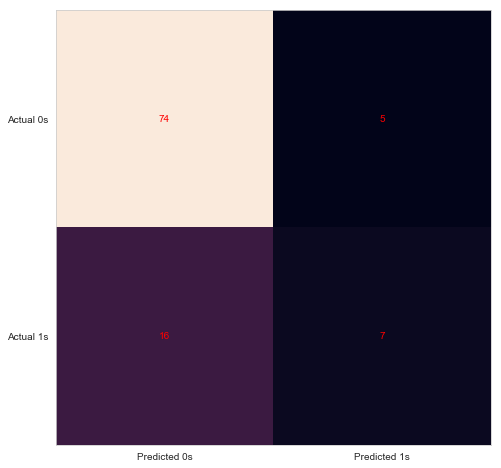

In [47]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [48]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           1       0.82      0.94      0.88        79
           2       0.58      0.30      0.40        23

   micro avg       0.79      0.79      0.79       102
   macro avg       0.70      0.62      0.64       102
weighted avg       0.77      0.79      0.77       102

